In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split



In [223]:

df = pd.read_csv('healthcare-dataset-stroke-data.csv')



In [224]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [225]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [226]:
df.shape

(5110, 12)

In [227]:
len(df)

5110

In [228]:
df.describe()
# bmi count is < than total rows, might have missing values
# max for bmi is significantly higher than the mean, might have outliers

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [229]:
# Find missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

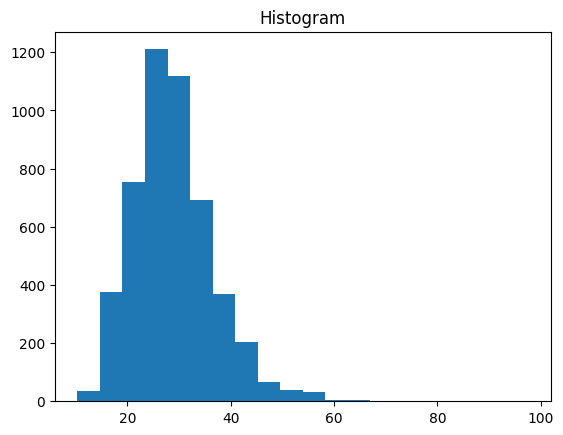

In [230]:
plt.hist(df['bmi'], bins=20)
plt.title('Histogram')
plt.show()

In [231]:
## Fill in NaN values with median
for i in ["bmi"]:
    df[i] = df[i].fillna(df[i].median())

df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

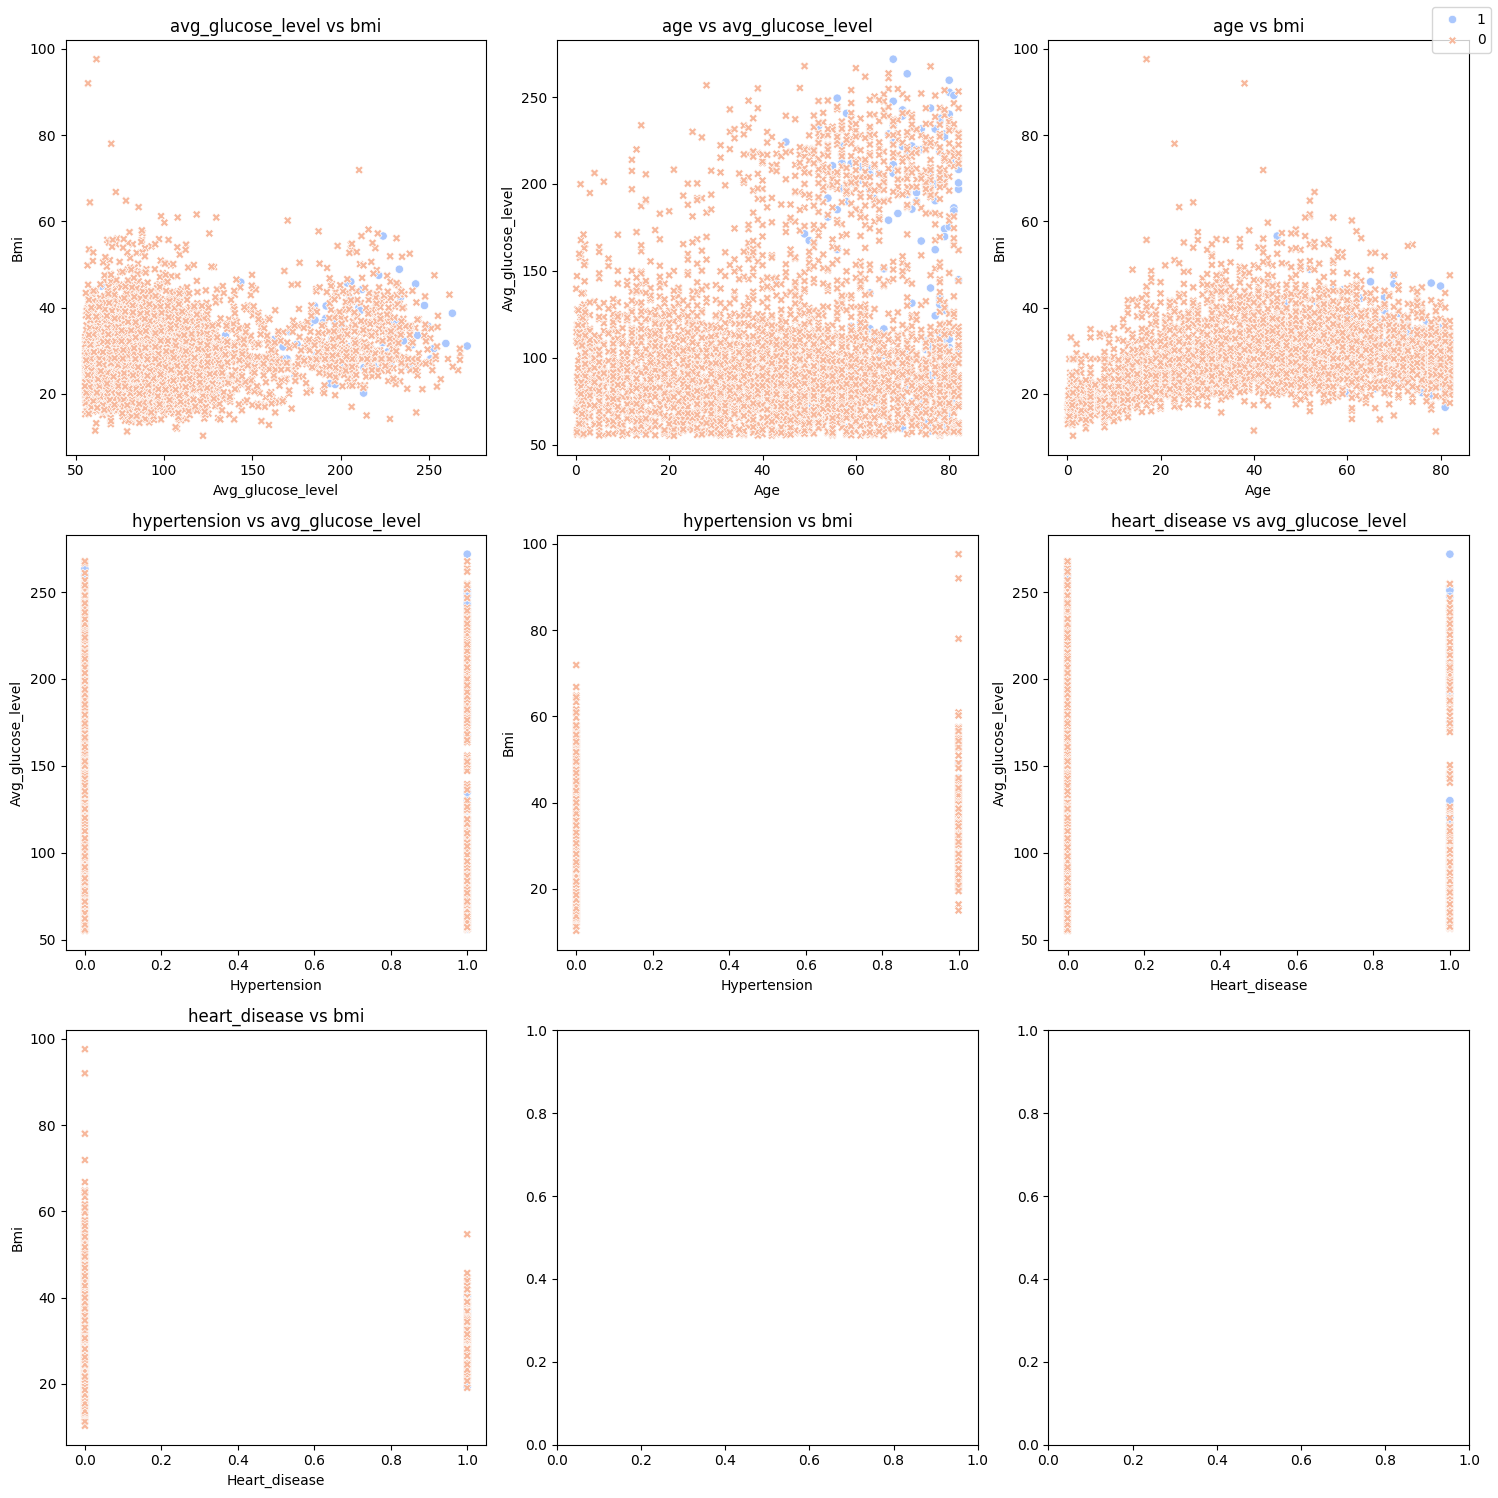

In [232]:
# Convert 'stroke' column to string for categorical representation
df['stroke'] = df['stroke'].astype(str)

# Define the feature pairs to plot
feature_pairs = [
    ('avg_glucose_level', 'bmi'),
    ('age', 'avg_glucose_level'),
    ('age', 'bmi'),
    ('hypertension', 'avg_glucose_level'),
    ('hypertension', 'bmi'),
    ('heart_disease', 'avg_glucose_level'),
    ('heart_disease', 'bmi')
]

# Number of rows and columns for the subplot grid
nrows = 3
ncols = 3

# Create a 3x3 grid for the scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

# Loop through each feature pair and create scatter plots
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    row = i // ncols  # Determine the row of the subplot
    col = i % ncols  # Determine the column of the subplot
    
    sns.scatterplot(
        data=df,
        x=x_feature,
        y=y_feature,
        hue='stroke',  # Color by 'stroke' category
        style='stroke',  # Different markers for stroke/no-stroke
        palette='coolwarm',
        ax=axs[row, col]  # Use the specific subplot axis
    )
    axs[row, col].set_title(f"{x_feature} vs {y_feature}")
    axs[row, col].set_xlabel(x_feature.capitalize())
    axs[row, col].set_ylabel(y_feature.capitalize())

    # Hide the legend in individual plots
    axs[row, col].legend([], [], frameon=False)

# Add a shared legend for the whole grid
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Adjust layout for better spacing
fig.tight_layout()
plt.show()

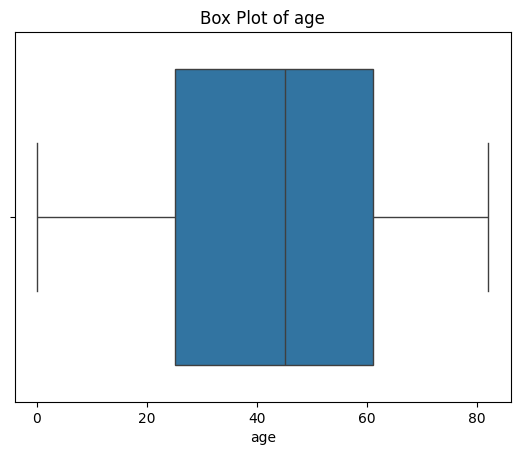

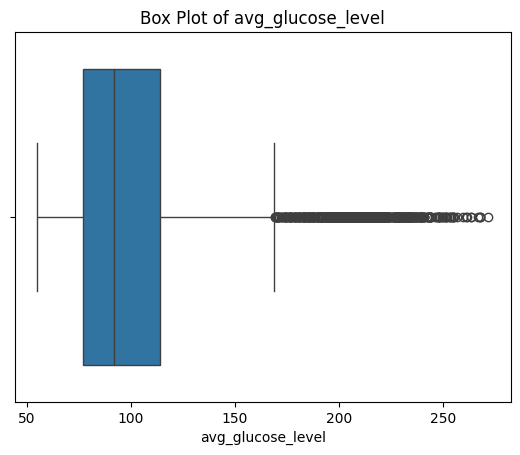

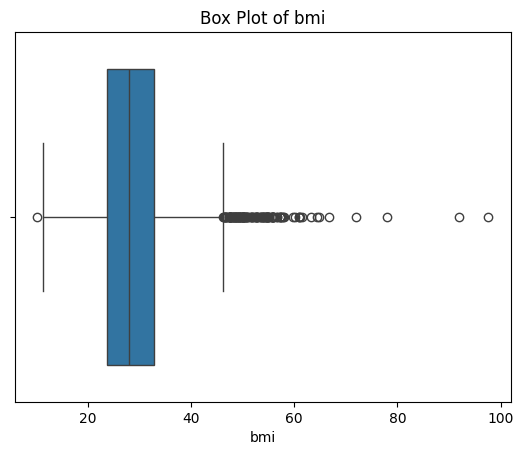

Outliers in bmi: 2.47%
Outliers in avg_glucose_level: 12.27%


In [233]:
## Detecting Outliers

numerical_cols =  ['age', 'avg_glucose_level', 'bmi']

for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


# Calculate the percentage of outliers for a specific column
column = 'bmi'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outlier_percentage = len(outliers) / len(df) * 100
print(f"Outliers in {column}: {outlier_percentage:.2f}%")

# Calculate the percentage of outliers for a avg_glucose_level
column2 = 'avg_glucose_level'
Q1 = df[column2].quantile(0.25)
Q3 = df[column2].quantile(0.75)
IQR = Q3 - Q1
lower_bound2 = Q1 - 1.5 * IQR
upper_bound2 = Q3 + 1.5 * IQR

outliers2 = df[(df[column2] < lower_bound2) | (df[column2] > upper_bound2)]
outlier_percentage2 = len(outliers2) / len(df) * 100
print(f"Outliers in {column2}: {outlier_percentage2:.2f}%")


In [234]:
# For bmi column
median_bmi = np.median(df['bmi'])
df.loc[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound), 'bmi'] = median_bmi

# For avg_glucose_level column
median_glucose = np.median(df['avg_glucose_level'])
df.loc[(df['avg_glucose_level'] < lower_bound2) | (df['avg_glucose_level'] > upper_bound2), 'avg_glucose_level'] = median_glucose



In [235]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,91.490283,28.248689
std,21161.721625,22.612647,0.296607,0.226063,21.201454,6.547276
min,67.000000,0.080000,0.000000,0.000000,55.120000,11.300000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000
50%,36932.000000,45.000000,0.000000,0.000000,91.882500,28.100000
75%,54682.000000,61.000000,0.000000,0.000000,101.295000,32.200000
max,72940.000000,82.000000,1.000000,1.000000,168.680000,46.200000


In [236]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,91.885,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,91.885,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.920,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,91.885,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,91.885,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.750,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.200,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.990,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.290,25.6,formerly smoked,0


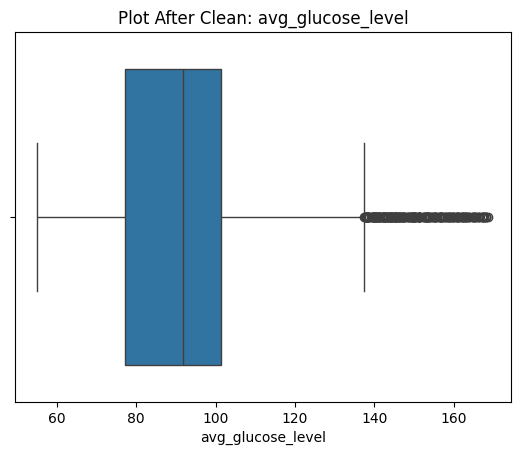

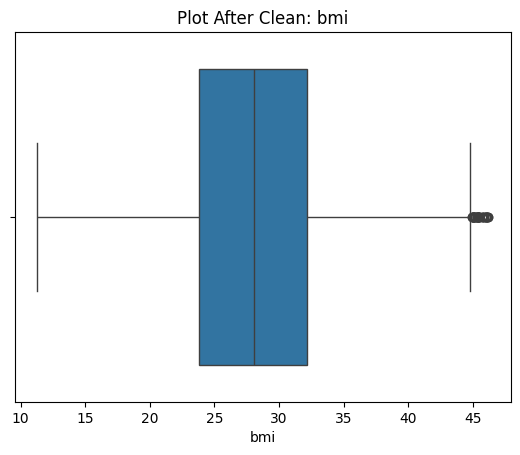

In [237]:
numerical_cols = ['avg_glucose_level', 'bmi']

for col in numerical_cols:
    sns.boxplot(x=df[col])  # Set x for a horizontal box plot
    plt.title(f'Plot After Clean: {col}')  # Update the title
    plt.show()


In [238]:
df = df.drop('id', axis =1)
df = pd.get_dummies(df, columns= ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [239]:
print(df.head())


    age  hypertension  heart_disease  avg_glucose_level   bmi stroke  \
0  67.0             0              1             91.885  36.6      1   
1  61.0             0              0             91.885  28.1      1   
2  80.0             0              1            105.920  32.5      1   
3  49.0             0              0             91.885  34.4      1   
4  79.0             1              0             91.885  24.0      1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0          False         True         False            False  ...   
1           True        False         False            False  ...   
2          False         True         False            False  ...   
3           True        False         False            False  ...   
4           True        False         False            False  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1     

In [240]:
## binning vs no binning

# Define the bins and labels
bins = [0, 18.5, 24.9, float('inf')]  # bins for Underweight, Healthy, and Overweight
labels = ['Underweight', 'Healthy', 'Overweight']  # corresponding labels

# Create a new DataFrame df_binned by copying the original df
df_binned = df.copy()

# Apply the binning to the 'bmi' column in df_binned
df_binned['bmi_category'] = pd.cut(df_binned['bmi'], bins=bins, labels=labels, right=False)

df_binned = df_binned.drop('bmi', axis=1)
#ohe bmi category
df_binned = pd.get_dummies(df_binned, columns=['bmi_category'])

In [241]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,91.885,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,91.885,28.1,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.920,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,91.885,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,91.885,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.750,28.1,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,81.0,0,0,125.200,40.0,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,82.990,30.6,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,166.290,25.6,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [242]:
df = df.drop(['gender_Other', 'work_type_Never_worked', 'work_type_children'], axis=1)

In [243]:
class_distribution = df['stroke'].value_counts()
print(class_distribution)


stroke
0    4861
1     249
Name: count, dtype: int64


In [244]:
## accuracy comparison between binned vs no binned
X = df.drop('stroke', axis=1).to_numpy()
y = df['stroke'].to_numpy()

a = df_binned.drop(['stroke'], axis=1).to_numpy()
b = df_binned['stroke'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=173)
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=173)

from sklearn.metrics import accuracy_score


# # Model for non-binned data
# model1 = DecisionTreeClassifier(random_state=42)
# model1.fit(X_train, y_train)

# # Model for binned data
# model2 = DecisionTreeClassifier(random_state=42)
# model2.fit(a_train, b_train)



In [245]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Check the class distribution before and after SMOTE
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())



Before SMOTE: 0    3404
1     173
Name: count, dtype: int64
After SMOTE: 0    3404
1    3404
Name: count, dtype: int64


In [246]:
# # accuracy results for both datasets
# y_pred = model1.predict(X_test)
# b_pred = model2.predict(a_test)

# accuracy_no_binned = accuracy_score(y_test, y_pred)
# accuracy_binned = accuracy_score(b_test, b_pred)


# print(f"Accuracy on non-binned data: {accuracy_no_binned}")
# print(f"Accuracy on binned data: {accuracy_binned}")


In [247]:
# # feature importance
# feature_label = df.drop('stroke', axis=1).columns.to_numpy()

# importance = model1.feature_importances_

# feature_index_by_importance = importance.argsort()

# for i in feature_index_by_importance:
#     print(feature_label[i], importance[i]*100)

In [248]:
# feature importance
# feature_label = df_binned.drop('stroke', axis=1).columns.to_numpy()

# importance = model2.feature_importances_

# feature_index_by_importance = importance.argsort()

# for i in feature_index_by_importance:
#     print(feature_label[i], importance[i]*100)

In [249]:
# Trying out models
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine (SVM)
from sklearn.svm import SVC  # SVC is for classification, 

# Gradient Boosting (e.g., GradientBoostingClassifier)
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
svc = SVC()
qda = QuadraticDiscriminantAnalysis()


In [250]:
dtc.fit(X_train_smote, y_train_smote)
knn.fit(X_train_smote, y_train_smote)
rf.fit(X_train_smote, y_train_smote)
gbc.fit(X_train_smote, y_train_smote)
svc.fit(X_train_smote, y_train_smote)
qda.fit(X_train_smote, y_train_smote)

c:\Users\kohyx\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [251]:
print('Decision Tree Classifier Accuracy:', accuracy_score(y_test, dtc.predict(X_test)))
print('KNN Accuracy:', accuracy_score(y_test, knn.predict(X_test)))
print('Gradient Boosting Accuracy:', accuracy_score(y_test, gbc.predict(X_test)))
print('Random Forest Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('SVC Accuracy:', accuracy_score(y_test, svc.predict(X_test)))
print('QDA Accuracy:', accuracy_score(y_test, qda.predict(X_test)))

Decision Tree Classifier Accuracy: 0.9047619047619048
KNN Accuracy: 0.7971298108284409
Gradient Boosting Accuracy: 0.9471624266144814
Random Forest Accuracy: 0.943900848010437
SVC Accuracy: 0.6386170906718852
QDA Accuracy: 0.18851924331376385


In [252]:
from sklearn.metrics import confusion_matrix, classification_report

print('Decision Tree Classifier Classification Report:\n', classification_report(y_test, dtc.predict(X_test)), '\n')
print('KNN Classification Report:\n', classification_report(y_test, knn.predict(X_test)), '\n')


Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1457
           1       0.08      0.09      0.09        76

    accuracy                           0.90      1533
   macro avg       0.52      0.52      0.52      1533
weighted avg       0.91      0.90      0.91      1533
 

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      1457
           1       0.14      0.58      0.22        76

    accuracy                           0.80      1533
   macro avg       0.55      0.69      0.55      1533
weighted avg       0.93      0.80      0.85      1533
 



In [253]:
print('gbc Classification Report:\n', classification_report(y_test, gbc.predict(X_test)), '\n')
print('rf Classification Report:\n', classification_report(y_test, rf.predict(X_test)), '\n')


gbc Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533
 

rf Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.94      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.94      0.92      1533
 



In [254]:
print('qda Classification Report:\n', classification_report(y_test, qda.predict(X_test)), '\n')
print('svc Classification Report:\n', classification_report(y_test, svc.predict(X_test)), '\n')


qda Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.15      0.26      1457
           1       0.06      0.97      0.11        76

    accuracy                           0.19      1533
   macro avg       0.52      0.56      0.18      1533
weighted avg       0.94      0.19      0.25      1533
 

svc Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.62      0.77      1457
           1       0.11      0.93      0.20        76

    accuracy                           0.64      1533
   macro avg       0.55      0.78      0.49      1533
weighted avg       0.95      0.64      0.74      1533
 



In [255]:
print('qda confusion:\n', confusion_matrix(qda.predict(X_test), y_test),'\n')


qda confusion:
 [[ 215    2]
 [1242   74]] 



In [256]:
from sklearn.model_selection import GridSearchCV
params =  {
    'priors': [None, [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]], 
    'reg_param': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0],         
    'store_covariance': [True, False],                     
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]                        
}

gs_qda = GridSearchCV(qda, params, n_jobs=4, verbose=100)
gs_qda.fit(X_train_smote, y_train_smote)
print(gs_qda.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'priors': [0.6, 0.4], 'reg_param': 0.01, 'store_covariance': True, 'tol': 0.0001}


c:\Users\kohyx\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [257]:
model = QuadraticDiscriminantAnalysis(
    priors= [0.6, 0.4], 
    reg_param= 0.01, 
    store_covariance= True, 
    tol= 0.0001
)
model.fit(X_train_smote, y_train_smote)

c:\Users\kohyx\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=[0.6, 0.4], reg_param=0.01,
                              store_covariance=True)

In [258]:
print('qda Accuracy:\n', accuracy_score(y_test, model.predict(X_test)), '\n')

print('qda Classification Report:\n', classification_report(y_test, model.predict(X_test)), '\n')



qda Accuracy:
 0.7214611872146118 

qda Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83      1457
           1       0.12      0.76      0.21        76

    accuracy                           0.72      1533
   macro avg       0.55      0.74      0.52      1533
weighted avg       0.94      0.72      0.80      1533
 



In [259]:
input_features = [
    61.0,  # age
    0,     # hypertension
    0,     # heart_disease
    91.885, # avg_glucose_level
    28.1,  # bmi
    1,     # gender_Female
    0,     # gender_Male
    0,     # ever_married_No
    1,     # ever_married_Yes
    0,     # work_type_Govt_job
    0,     # work_type_Private
    1,     # work_type_Self-employed
    1,     # Residence_type_Rural
    0,     # Residence_type_Urban
    0,     # smoking_status_Unknown
    0,     # smoking_status_formerly smoked
    1,     # smoking_status_never smoked
    0      # smoking_status_smokes
]

# Make a prediction
prediction = model.predict([input_features])
print(prediction)  



['1']


In [265]:
input_features = [
    81.0,  # age
    0,     # hypertension
    0,     # heart_disease
    125.2, # avg_glucose_level
    40,  # bmi
    1,     # gender_Female
    0,     # gender_Male
    0,     # ever_married_No
    1,     # ever_married_Yes
    0,     # work_type_Govt_job
    0,     # work_type_Private
    1,     # work_type_Self-employed
    0,     # Residence_type_Rural
    1,     # Residence_type_Urban
    0,     # smoking_status_Unknown
    0,     # smoking_status_formerly smoked
    1,     # smoking_status_never smoked
    0      # smoking_status_smokes
]

# Make a prediction
prediction = model.predict([input_features])
print(prediction)  

['0']


In [260]:
import joblib
joblib.dump(model, "stroke_rf.pkl")

['stroke_rf.pkl']

In [261]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,91.885,36.6,1,False,True,False,True,False,True,False,False,True,False,True,False,False
1,61.0,0,0,91.885,28.1,1,True,False,False,True,False,False,True,True,False,False,False,True,False
2,80.0,0,1,105.920,32.5,1,False,True,False,True,False,True,False,True,False,False,False,True,False
3,49.0,0,0,91.885,34.4,1,True,False,False,True,False,True,False,False,True,False,False,False,True
4,79.0,1,0,91.885,24.0,1,True,False,False,True,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.750,28.1,0,True,False,False,True,False,True,False,False,True,False,False,True,False
5106,81.0,0,0,125.200,40.0,0,True,False,False,True,False,False,True,False,True,False,False,True,False
5107,35.0,0,0,82.990,30.6,0,True,False,False,True,False,False,True,True,False,False,False,True,False
5108,51.0,0,0,166.290,25.6,0,False,True,False,True,False,True,False,True,False,False,True,False,False
